In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
%matplotlib inline

# Introduction

The analysis is based on information from [this website](http://www.cleanenergyregulator.gov.au/NGER/Reporting-cycle). 

From the website: *Companies are responsible for assessing their own obligations under the  National Greenhouse and Energy Reporting Act 2007 (NGER Act). The four steps below will help you understand your obligations under the NGER scheme.*

1. Assess your obligations
You will need to consider whether your company meets a facility or corporate group threshold for scope 1 or scope 2 emissions of greenhouse gases or for energy consumption or energy production.

2. Register and deregister
If a facility or corporate group threshold is met, the controlling corporation will need to register under the NGER Scheme. In some circumstances a controlling corporation may choose to transfer reporting obligations using a Reporting Transfer Certificate or a Section 22X agreement. A registered corporation that no longer triggers reporting thresholds should apply for deregistration.

3. Report
You will then need to report through the Emissions and Energy Reporting System.

4. Record keeping, monitoring and compliance
Record keeping, monitoring and compliance are essential to ensuring the integrity of the NGER scheme and form an important part of the reporting cycle.

**In short: Companies that meet the following reporting threshold has to**:

* **register under the NGER scheme and report their emissions & energy consumption each year**.
* **report their emissions & energy consumption each year**.
* **being monitored under the NGER scheme**.

For more info about the obligations of the companies, see [Complying with NGER](http://www.cleanenergyregulator.gov.au/NGER/Reporting-cycle/Complying-with-NGER).

**[Reporting Threshold](http://www.cleanenergyregulator.gov.au/NGER/Reporting-cycle/Assess-your-obligations/Reporting-thresholds)**:
* Corporate group thresholds: The current corporate group threshold is:

  * 50 kt or more of greenhouse gases (CO2-e) (scope 1 and scope 2 emissions)
  * production of 200 TJ or more of energy, or
  * consumption of 200 TJ or more of energy.
  
For more info about Scope 1 & 2 emissions, see [here](http://www.cleanenergyregulator.gov.au/NGER/About-the-National-Greenhouse-and-Energy-Reporting-scheme/Greenhouse-gases-and-energy#n2).

# Data Preprocessing

The data below is the information reported to the Clean Energy Regulator (the agency) by controlling corporations and reporting transfer certificate holders that met a reporting threshold under the National Greenhouse and Energy Reporting (NGER) scheme in 2019–20. More details can be found [here](http://www.cleanenergyregulator.gov.au/NGER/National%20greenhouse%20and%20energy%20reporting%20data/Corporate%20emissions%20and%20energy%20data/corporate-emissions-and-energy-data-2019-20).

In [4]:
nger_1920 = pd.read_csv('19-20.csv', thousands=r',')

In [5]:
nger_1920

,Organisation name,Identifying details,Total scope 1 emissions (t CO2-e),Total scope 2 emissions (t CO2-e),Net energy consumed (GJ),Important notes
0,AGL ENERGY LIMITED,74 115 061 375,42227180,512404,327755307,-
1,ENERGYAUSTRALIA HOLDINGS LIMITED,57 101 876 135,17935957,229029,147473227,-
2,STANWELL CORPORATION LIMITED,37 078 848 674,17126943,64484,126966249,-
3,ORIGIN ENERGY LIMITED,30 000 051 696,15997984,2402842,143163928,-
4,C S ENERGY LIMITED,54 078 848 745,13199922,127393,91862108,Please note that where more than one person ha...
...,...,...,...,...,...,...
410,MCDONALD'S AUSTRALIA LIMITED,43 008 496 928,232,79024,349138,-
411,AIRTRUNK AUSTRALIA HOLDING PTY LTD,50 616 379 232,132,94528,397923,-
412,DIGITAL AUSTRALIA INVESTMENT MANAGEMENT PTY LI...,27 150 294 134,98,52544,215987,-
413,GLOBAL SWITCH AUSTRALIA PTY LIMITED,65 094 338 333,92,137617,612953,-


Remove & rename some columns.

In [6]:
nger_1920.drop(labels=['Important notes'], axis=1, inplace=True)
nger_1920 = nger_1920.rename({
    'Total scope 1 emissions (t CO2-e)': 'Scope 1 (tCO2-e)',
    'Total scope 2 emissions (t CO2-e)': 'Scope 2 (tCO2-e)',
}, axis='columns')

Create a new column `Scope 1 + 2 (tCO2-e)` for combined scope 1 & 2 emissions.

In [7]:
nger_1920['Scope 1 + 2 (tCO2-e)'] = nger_1920['Scope 1 (tCO2-e)'] + nger_1920['Scope 2 (tCO2-e)']

# Analysis

In [8]:
nger_1920

,Organisation name,Identifying details,Scope 1 (tCO2-e),Scope 2 (tCO2-e),Net energy consumed (GJ),Scope 1 + 2 (tCO2-e)
0,AGL ENERGY LIMITED,74 115 061 375,42227180,512404,327755307,42739584
1,ENERGYAUSTRALIA HOLDINGS LIMITED,57 101 876 135,17935957,229029,147473227,18164986
2,STANWELL CORPORATION LIMITED,37 078 848 674,17126943,64484,126966249,17191427
3,ORIGIN ENERGY LIMITED,30 000 051 696,15997984,2402842,143163928,18400826
4,C S ENERGY LIMITED,54 078 848 745,13199922,127393,91862108,13327315
...,...,...,...,...,...,...
410,MCDONALD'S AUSTRALIA LIMITED,43 008 496 928,232,79024,349138,79256
411,AIRTRUNK AUSTRALIA HOLDING PTY LTD,50 616 379 232,132,94528,397923,94660
412,DIGITAL AUSTRALIA INVESTMENT MANAGEMENT PTY LI...,27 150 294 134,98,52544,215987,52642
413,GLOBAL SWITCH AUSTRALIA PTY LIMITED,65 094 338 333,92,137617,612953,137709


## Companies crossing the threshold of consuming 200TJ or more energy

403/415 companies in the list cross this threshold.

In [9]:
nger_1920[nger_1920['Net energy consumed (GJ)'] > 200 * 1000]['Organisation name']

0                                     AGL ENERGY LIMITED
1                       ENERGYAUSTRALIA HOLDINGS LIMITED
2                           STANWELL CORPORATION LIMITED
3                                  ORIGIN ENERGY LIMITED
4                                     C S ENERGY LIMITED
                             ...                        
409                                     JB HI-FI LIMITED
410                         MCDONALD'S AUSTRALIA LIMITED
411                   AIRTRUNK AUSTRALIA HOLDING PTY LTD
412    DIGITAL AUSTRALIA INVESTMENT MANAGEMENT PTY LI...
413                  GLOBAL SWITCH AUSTRALIA PTY LIMITED
Name: Organisation name, Length: 403, dtype: object

## Companies crossing the threshold of having scope 1 + 2 emissions of more than 50 kt CO2-e

415/415 companies in the list also cross this threshold.

In [10]:
nger_1920[nger_1920['Scope 1 + 2 (tCO2-e)'] > 50 * 1000]['Organisation name']

0                                     AGL ENERGY LIMITED
1                       ENERGYAUSTRALIA HOLDINGS LIMITED
2                           STANWELL CORPORATION LIMITED
3                                  ORIGIN ENERGY LIMITED
4                                     C S ENERGY LIMITED
                             ...                        
410                         MCDONALD'S AUSTRALIA LIMITED
411                   AIRTRUNK AUSTRALIA HOLDING PTY LTD
412    DIGITAL AUSTRALIA INVESTMENT MANAGEMENT PTY LI...
413                  GLOBAL SWITCH AUSTRALIA PTY LIMITED
414          LYONDELLBASELL AUSTRALIA (HOLDINGS) PTY LTD
Name: Organisation name, Length: 415, dtype: object

## Companies crossing the threshold of having SCOPE 2 EMISSIONS ALONE of more than 50 kt CO2-e

I would assume this to be the market of CellEngineer C&I (without considering the overlapping companies in the Utilities market). The reason is that these companies would benefit the most from investing in renewables and battery storage.

In [11]:
nger_1920[nger_1920['Scope 2 (tCO2-e)'] > 50 * 1000]['Organisation name']

0                                     AGL ENERGY LIMITED
1                       ENERGYAUSTRALIA HOLDINGS LIMITED
2                           STANWELL CORPORATION LIMITED
3                                  ORIGIN ENERGY LIMITED
4                                     C S ENERGY LIMITED
                             ...                        
410                         MCDONALD'S AUSTRALIA LIMITED
411                   AIRTRUNK AUSTRALIA HOLDING PTY LTD
412    DIGITAL AUSTRALIA INVESTMENT MANAGEMENT PTY LI...
413                  GLOBAL SWITCH AUSTRALIA PTY LIMITED
414          LYONDELLBASELL AUSTRALIA (HOLDINGS) PTY LTD
Name: Organisation name, Length: 230, dtype: object

According to the current assumptions, without considering the overlapping companies in the Utilities market, the market for CellEngineer C&I consists of 230 companies. We can now export these companies into a csv file.

In [34]:
ci_market = nger_1920[nger_1920['Scope 2 (tCO2-e)'] > 50 * 1000]

In [35]:
ci_market

,Organisation name,Identifying details,Scope 1 (tCO2-e),Scope 2 (tCO2-e),Net energy consumed (GJ),Scope 1 + 2 (tCO2-e)
0,AGL ENERGY LIMITED,74 115 061 375,42227180,512404,327755307,42739584
1,ENERGYAUSTRALIA HOLDINGS LIMITED,57 101 876 135,17935957,229029,147473227,18164986
2,STANWELL CORPORATION LIMITED,37 078 848 674,17126943,64484,126966249,17191427
3,ORIGIN ENERGY LIMITED,30 000 051 696,15997984,2402842,143163928,18400826
4,C S ENERGY LIMITED,54 078 848 745,13199922,127393,91862108,13327315
...,...,...,...,...,...,...
410,MCDONALD'S AUSTRALIA LIMITED,43 008 496 928,232,79024,349138,79256
411,AIRTRUNK AUSTRALIA HOLDING PTY LTD,50 616 379 232,132,94528,397923,94660
412,DIGITAL AUSTRALIA INVESTMENT MANAGEMENT PTY LI...,27 150 294 134,98,52544,215987,52642
413,GLOBAL SWITCH AUSTRALIA PTY LIMITED,65 094 338 333,92,137617,612953,137709


In [37]:
ci_market.to_csv('ci-market.csv')

Scope 2 emissions distribution:

In [12]:
nger_1920

,Organisation name,Identifying details,Scope 1 (tCO2-e),Scope 2 (tCO2-e),Net energy consumed (GJ),Scope 1 + 2 (tCO2-e)
0,AGL ENERGY LIMITED,74 115 061 375,42227180,512404,327755307,42739584
1,ENERGYAUSTRALIA HOLDINGS LIMITED,57 101 876 135,17935957,229029,147473227,18164986
2,STANWELL CORPORATION LIMITED,37 078 848 674,17126943,64484,126966249,17191427
3,ORIGIN ENERGY LIMITED,30 000 051 696,15997984,2402842,143163928,18400826
4,C S ENERGY LIMITED,54 078 848 745,13199922,127393,91862108,13327315
...,...,...,...,...,...,...
410,MCDONALD'S AUSTRALIA LIMITED,43 008 496 928,232,79024,349138,79256
411,AIRTRUNK AUSTRALIA HOLDING PTY LTD,50 616 379 232,132,94528,397923,94660
412,DIGITAL AUSTRALIA INVESTMENT MANAGEMENT PTY LI...,27 150 294 134,98,52544,215987,52642
413,GLOBAL SWITCH AUSTRALIA PTY LIMITED,65 094 338 333,92,137617,612953,137709


In [13]:
scope2 = nger_1920['Scope 2 (tCO2-e)']

In [14]:
scope2 = scope2.sort_values(ascending=False)

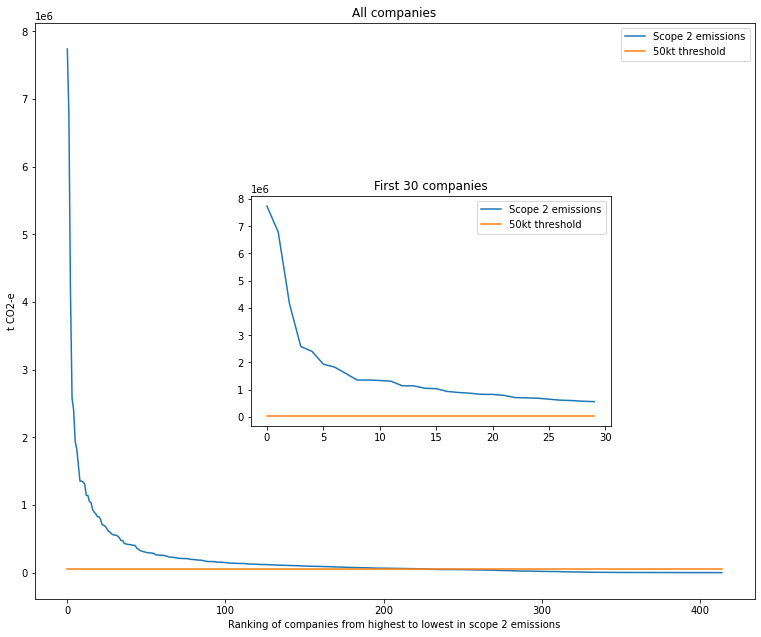

In [16]:
top = 30
portion = scope2[:top]

fig = plt.figure(figsize=(10, 8))

axes1 = fig.add_axes([0, 0, 1, 1])
axes1.plot(np.arange(len(scope2)), scope2)
axes1.plot(np.arange(len(scope2)), [50*1000] * len(scope2))
axes1.legend(['Scope 2 emissions', '50kt threshold'])
axes1.set_xlabel('Company indices from highest to lowest in scope 2 emissions')
axes1.set_ylabel('t CO2-e')
axes1.title.set_text('All companies')

axes2 = fig.add_axes([0.3, 0.3, 0.5, 0.4]) # left, bottom, width, height
axes2.title.set_text(f'First {top} companies')
axes2.plot(np.arange(len(portion)), portion)
axes2.plot(np.arange(len(portion)), [50*1000] * len(portion))
axes1.set_xlabel('Ranking of companies from highest to lowest in scope 2 emissions')
axes1.set_ylabel('t CO2-e')
axes2.legend(['Scope 2 emissions', '50kt threshold'])